In [45]:
import sys; sys.path.append("/home/g.samarth/dopplervel2/")
from time_series import get_s_plot as gs

ImportError: cannot import name 'get_s_plot' from 'time_series' (/home/g.samarth/dopplervel2/time_series.py)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


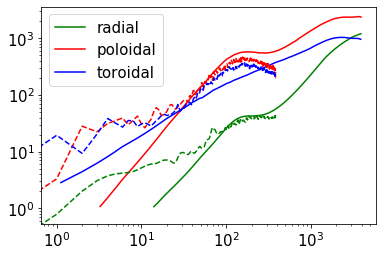

<Figure size 432x288 with 0 Axes>

In [74]:
%run rotation.py --cchpc --gnup 1

 i = 1 
 i = 50 
 i = 100 
 i = 150 
 i = 200 
 i = 250 
 i = 300 
 i = 350 


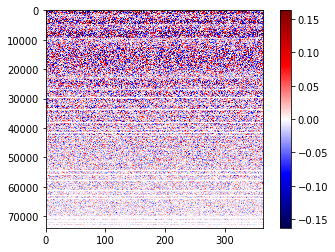

In [47]:
%run time_series.py --cchpc

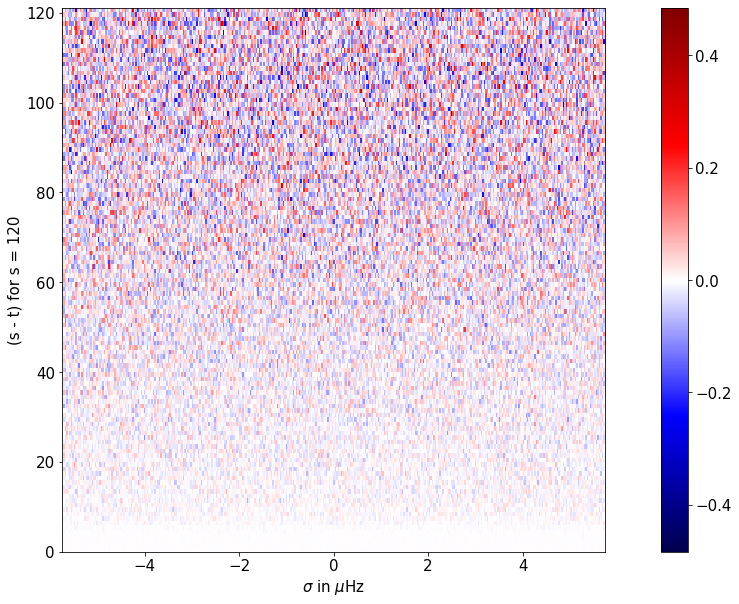

In [87]:
splot=120
ufreq_st = ufreq[ellArr==splot, :]
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20, 10))
im =plt.imshow(ufreq_st.real, aspect = 11.506/ufreq_st.shape[0],
               cmap="seismic", vmax=_max/5, vmin=-_max/5, interpolation=None,
              extent=[-5.753,5.753,0,ufreq_st.shape[0]])
plt.colorbar(im)
plt.xlabel("$\sigma$ in $\mu$Hz")
plt.ylabel(f"(s - t) for s = {splot}")
plt.savefig("/scratch/g.samarth/st-sigma.png")
plt.show()

In [88]:
freq_arr

array([ 0.00000000e+00,  3.16229158e-08,  6.32458317e-08,  9.48687475e-08,
        1.26491663e-07,  1.58114579e-07,  1.89737495e-07,  2.21360411e-07,
        2.52983327e-07,  2.84606243e-07,  3.16229158e-07,  3.47852074e-07,
        3.79474990e-07,  4.11097906e-07,  4.42720822e-07,  4.74343738e-07,
        5.05966653e-07,  5.37589569e-07,  5.69212485e-07,  6.00835401e-07,
        6.32458317e-07,  6.64081233e-07,  6.95704149e-07,  7.27327064e-07,
        7.58949980e-07,  7.90572896e-07,  8.22195812e-07,  8.53818728e-07,
        8.85441644e-07,  9.17064559e-07,  9.48687475e-07,  9.80310391e-07,
        1.01193331e-06,  1.04355622e-06,  1.07517914e-06,  1.10680205e-06,
        1.13842497e-06,  1.17004789e-06,  1.20167080e-06,  1.23329372e-06,
        1.26491663e-06,  1.29653955e-06,  1.32816247e-06,  1.35978538e-06,
        1.39140830e-06,  1.42303121e-06,  1.45465413e-06,  1.48627704e-06,
        1.51789996e-06,  1.54952288e-06,  1.58114579e-06,  1.61276871e-06,
        1.64439162e-06,  

In [3]:
import healpy as hp
import numpy as np
NSIDE = 128
NPIX = hp.nside2npix(NSIDE)
hpmap = np.random.rand(NPIX)
alm = hp.map2alm(hpmap)
lmax = hp.sphtfunc.Alm.getlmax(len(alm))
print(f"Is lmax=3*NSIDE -1 :{lmax==(3*NSIDE-1)}")
print(f"Is almsize=(lmax)*(lmax+1)/2 :{len(alm)==int(lmax*(lmax+1)/2)}")

Is lmax=3*NSIDE -1 :True
Is almsize=(lmax)*(lmax+1)/2 :False


In [4]:
len()

73920

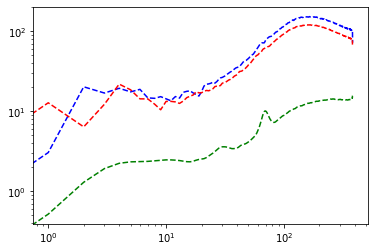

In [12]:
data_dir = "/scratch/g.samarth/HMIDATA/data_analysis/"
pf = np.load(data_dir + "power001.npz")['upow']
upow = np.zeros_like(pf)
vpow = np.zeros_like(pf)
wpow = np.zeros_like(pf)
for i in range(1, 100):
    fname = "power.final" + str(i).zfill(3) + ".npz"
    try:
        pf = np.load(data_dir + fname)
    except FileNotFoundError:
        pass
    upow += pf['upow']
    vpow += pf['vpow']
    wpow += pf['wpow']

plt.figure()
plt.loglog(upow/100, '--g')
plt.loglog(vpow/100, '--b')
plt.loglog(wpow/100, '--r')
plt.show()

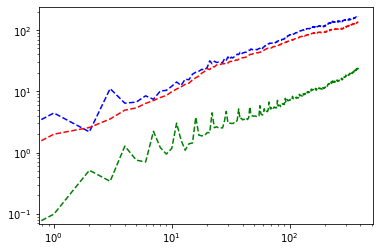

In [10]:
data_dir = "/scratch/g.samarth/HMIDATA/data_analysis/"
pf = np.load(data_dir + "power001.npz")['upow']
upow = np.zeros_like(pf)
vpow = np.zeros_like(pf)
wpow = np.zeros_like(pf)
for i in range(1, 100):
    fname = "power" + str(i).zfill(3) + ".npz"
    try:
        pf = np.load(data_dir + fname)
    except FileNotFoundError:
        pass
    upow += pf['upow']
    vpow += pf['vpow']
    wpow += pf['wpow']

plt.figure()
plt.loglog(upow/100, '--g')
plt.loglog(vpow/100, '--b')
plt.loglog(wpow/100, '--r')
plt.show()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


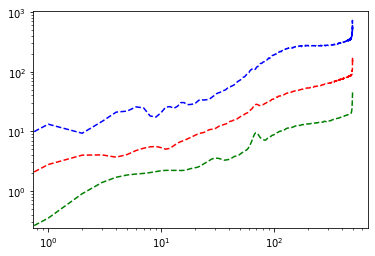

In [20]:
ellArr = np.load(data_dir + "ellArr.txt.npz")['ellArr']
emmArr = np.load(data_dir + "emmArr.txt.npz")['emmArr']
for i in range(1, 40):
    print(i)
    fname = "alm.data.inv" + str(i).zfill(3) + ".npz"
    try:
        alm = np.load(data_dir + fname)
    except FileNotFoundError:
        pass
    ulm = alm['ulm']
    vlm = alm['vlm']
    wlm = alm['wlm']
    if i==1:
        upow = computePS(ulm, 500, ellArr, emmArr)
        vpow = computePS(vlm, 500, ellArr, emmArr)
        wpow = computePS(wlm, 500, ellArr, emmArr)
    else:
        upow += computePS(ulm, 500, ellArr, emmArr)
        vpow += computePS(vlm, 500, ellArr, emmArr)
        wpow += computePS(wlm, 500, ellArr, emmArr)
        
plt.figure()
plt.loglog(upow/40, '--g')
plt.loglog(vpow/40, '--b')
plt.loglog(wpow/40, '--r')
plt.show()

In [34]:
ellArr = np.load(data_dir + "ellArr.txt.npz")['ellArr']
emmArr = np.load(data_dir + "emmArr.txt.npz")['emmArr']

In [40]:
emmArr.max()

499